In [ ]:
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scanpy.external as sce
import sys

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

sc.settings.set_figure_params(dpi=80)
%matplotlib inline

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sc.set_figure_params(scanpy=True, fontsize=14 )

%matplotlib inline
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Arial']
#import palantir
import scFates as scf

import warnings
warnings.filterwarnings("ignore")

In [ ]:
adata1 = sc.read('../adata_epcam_cluster_annotation.h5ad')

In [ ]:
adata1.uns['log1p']["base"] = None

In [ ]:
adata=adata1.copy()

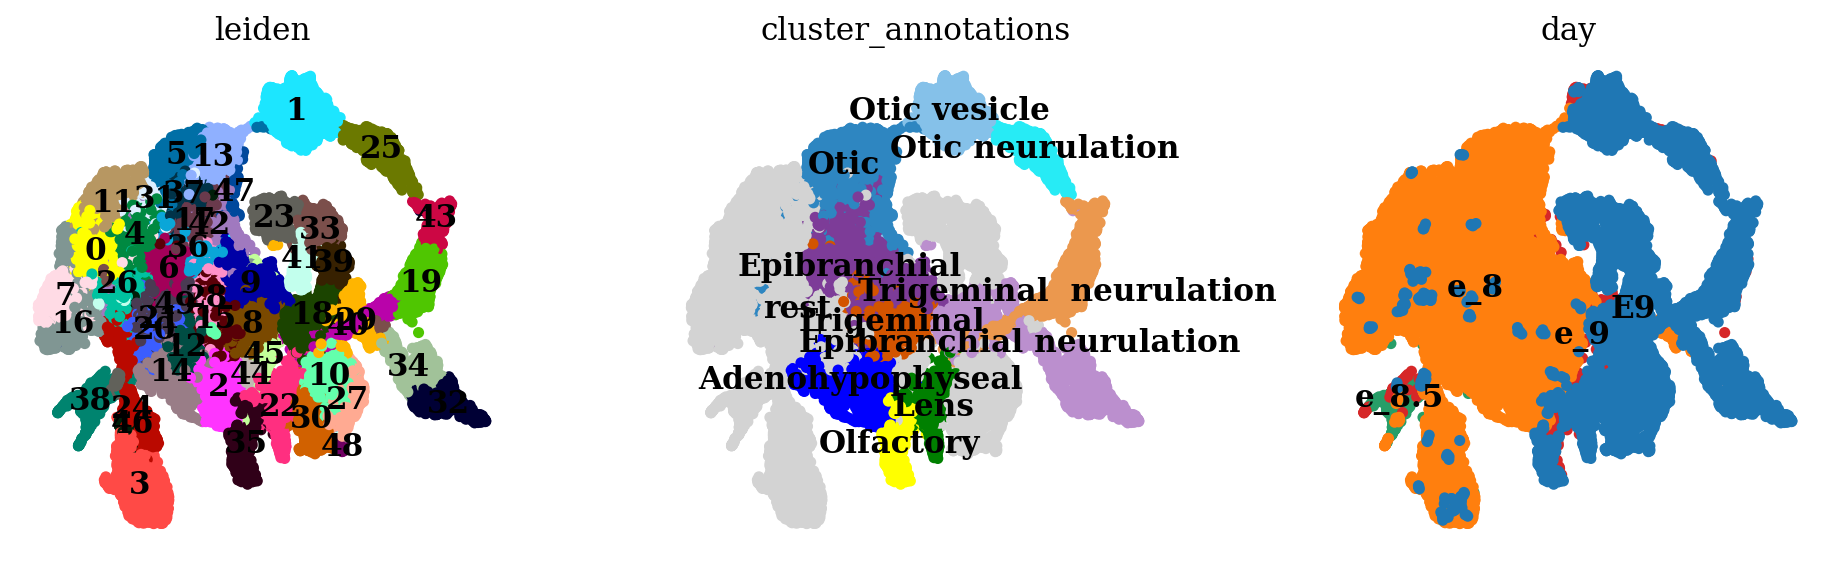

In [ ]:
sc.pl.umap(adata, color=['leiden', 'cluster_annotations', 'day'], size=100, frameon=False, legend_loc='on data')

# Epi

In [ ]:
# Define the cluster annotations you want to keep
clusters_to_keep = [
    "Epibranchial",
    "Epibranchial neurulation",

]

# Subset the AnnData object
adata_epi = adata[adata.obs['cluster_annotations'].isin(clusters_to_keep)].copy()

# Check the result
print(adata_epi)


AnnData object with n_obs × n_vars = 7676 × 25865
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'cluster_annotations'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cluster_annotations_colors', 'day_colors', 'hvg', 'leiden', 'leiden_colors', 'location_colors', 'log1p', 'neighbors', 'pca', 'plate_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'


In [ ]:
#adata_otic=adata_otic.raw.adata3()
adata_epi.raw=adata_epi

In [ ]:
adata_epi.layers["counts"] = adata_epi.X.copy()

In [ ]:
with open('/home/julia/data/Scenic_database/Mouse/TF/allTFs_mm.txt', 'r') as file:
    list_TF = []
    for line in file.read().split('\n'):

                list_TF.append(line)

#print(list_TF)

In [ ]:
all_g=adata_epi.var_names.copy()

In [ ]:
newList = []
for element in all_g:
    if element in list_TF:
        newList.append(element)
#print("Intersection of the lists is:", newList)

In [ ]:
adata_epi = adata_epi[:, newList]

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


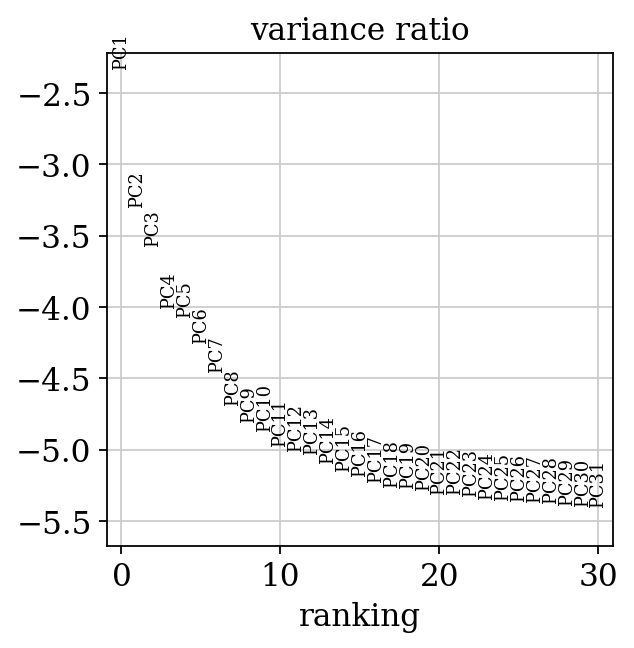

In [ ]:
sc.pp.scale(adata_epi, max_value=10)
sc.tl.pca(adata_epi, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_epi, log=True)

In [ ]:
sc.pp.neighbors(adata_epi, n_neighbors=15, n_pcs=30)
sc.tl.umap(adata_epi)
sc.tl.leiden(adata_epi)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:08)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:18)
running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


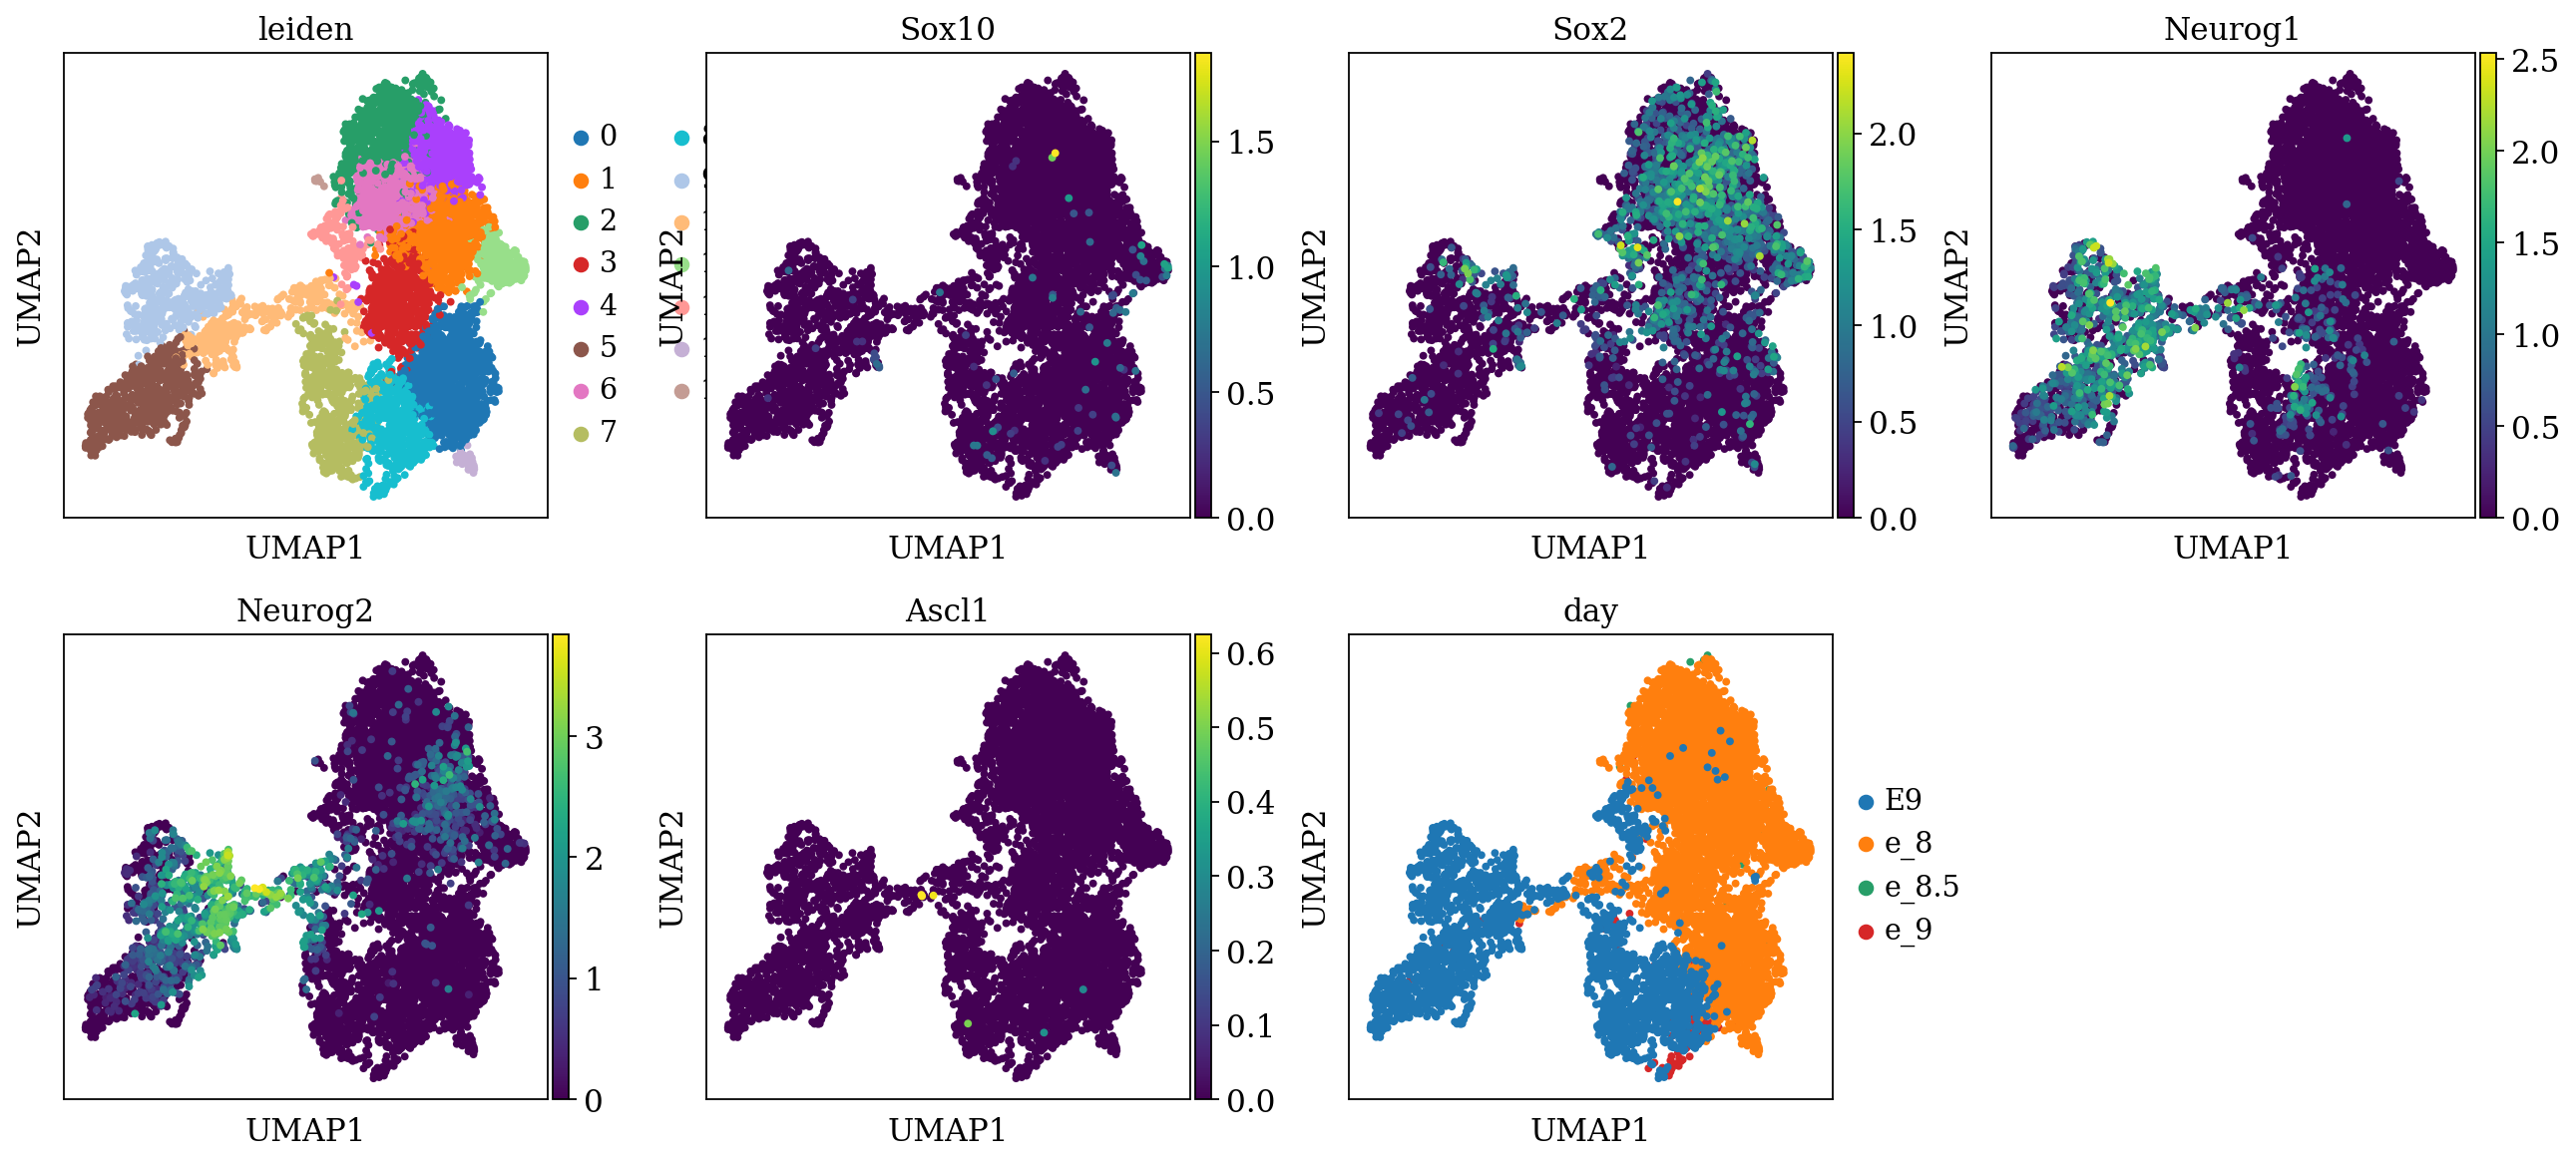

In [ ]:
sc.pl.umap(adata_epi, color=['leiden', 'Sox10', 'Sox2' ,'Neurog1', 'Neurog2',   'Ascl1', 'day'], size=50)

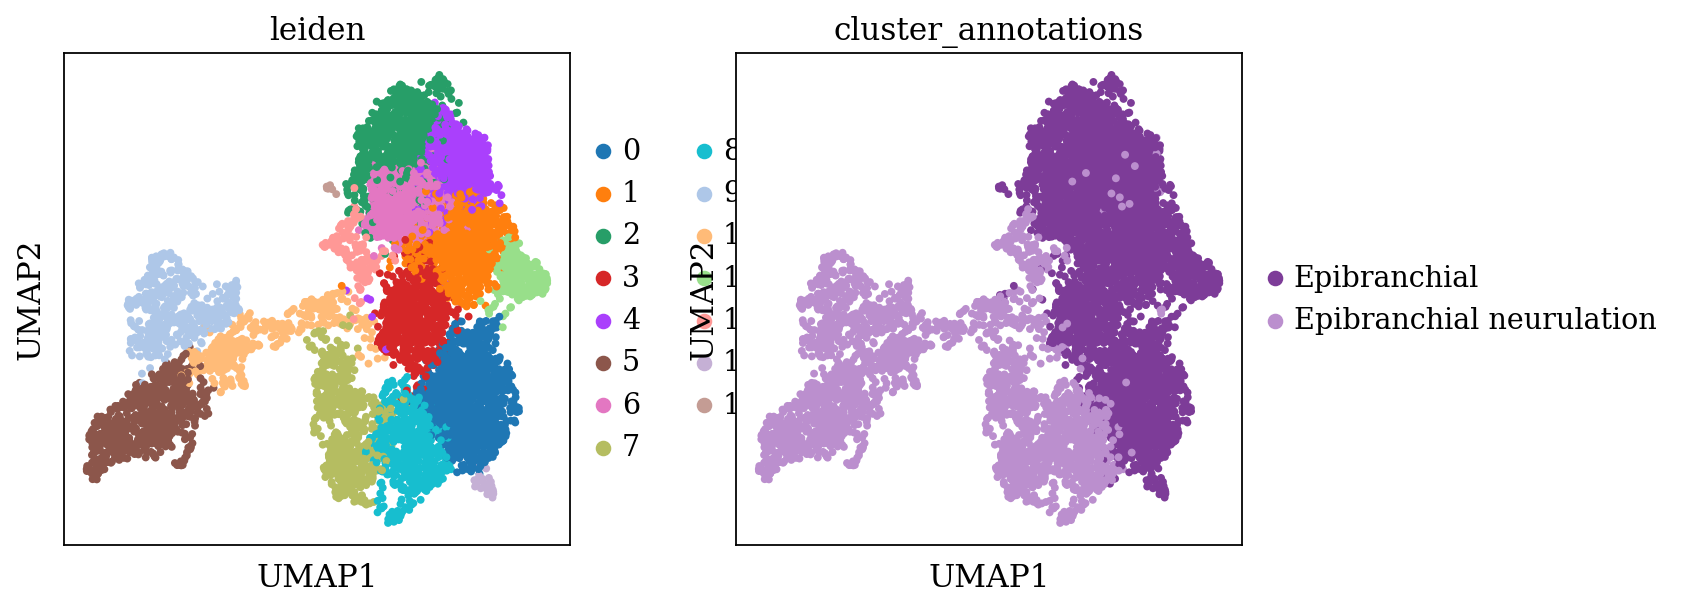

In [ ]:
sc.pl.umap(adata_epi, color=['leiden', 'cluster_annotations'], size=50)

In [ ]:
adata_epi.write_h5ad('Epibranchial__TF_UMAP.h5ad')